# Import necessary libraries

In [13]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords

# Download nltk data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
path = '/content/the-reddit-dataset-dataset-comments.csv'

# Load the dataset

In [15]:
_df = pd.read_csv(path)

# Check the structure of the data
_df.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
0,comment,hyyz6g8,2r97t,datasets,False,1646173750,https://old.reddit.com/r/datasets/comments/t45...,Spatial problem: Suitability of new locations ...,0.0772,1
1,comment,hyyid7v,2r97t,datasets,False,1646167280,https://old.reddit.com/r/datasets/comments/sg9...,Have you tried toying around with GDELT or Ali...,0.0000,2
2,comment,hyxp1qp,2r97t,datasets,False,1646156018,https://old.reddit.com/r/datasets/comments/t44...,Damn random internet person of whom I know not...,-0.3851,3
3,comment,hyxgnyu,2r97t,datasets,False,1646152782,https://old.reddit.com/r/datasets/comments/t44...,Ah nice one. Best of luck with the baby. If yo...,0.9136,3
4,comment,hyxfjw6,2r97t,datasets,False,1646152345,https://old.reddit.com/r/datasets/comments/t49...,I was about to write and say this shouldn't be...,0.0762,2


# Check for missing values and drop them if necessary

In [16]:
_df.dropna(subset=['body', 'sentiment'], inplace=True)

# Function to clean the text (remove special characters and stopwords)
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Apply cleaning function to 'body' column
_df['cleaned_comment'] = _df['body'].apply(clean_text)

In [17]:
df = _df

# Function to categorize sentiment score into positive, negative, and neutral

In [18]:
def categorize_sentiment(score):
    if score > 0.1:   # Positive sentiment
        return 'positive'
    elif score < -0.1:  # Negative sentiment
        return 'negative'
    else:  # Neutral sentiment
        return 'neutral'

# Apply sentiment categorization
df['sentiment_label'] = df['sentiment'].apply(categorize_sentiment)

# Prepare data for training

In [19]:
X = df['cleaned_comment']  # Feature: cleaned comments
y = df['sentiment_label']  # Label: sentiment categories

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer


In [20]:
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data, and transform the test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Naive Bayes
### Train the Naive Bayes model

In [21]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the model
print(f'Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}')
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.6633
[[ 189   79  967]
 [  12  572 2001]
 [  32   99 5523]]
              precision    recall  f1-score   support

    negative       0.81      0.15      0.26      1235
     neutral       0.76      0.22      0.34      2585
    positive       0.65      0.98      0.78      5654

    accuracy                           0.66      9474
   macro avg       0.74      0.45      0.46      9474
weighted avg       0.70      0.66      0.59      9474



# Confusion matrix visualization

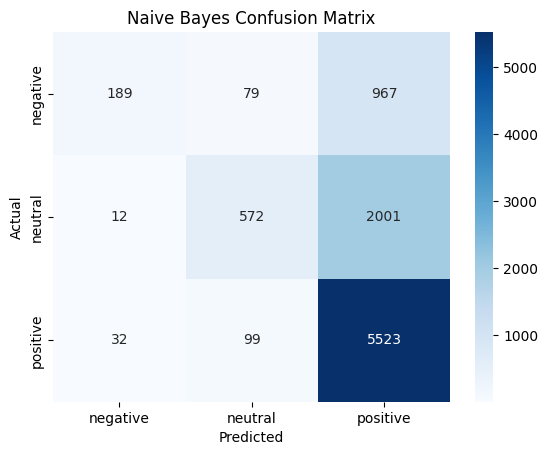

In [22]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

classes = sorted(y_test.unique())

sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Logistic Regression Model
### Train the Logistic Regression model

In [23]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate the Logistic Regression model
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}')
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8528
[[ 516  273  446]
 [  59 2293  233]
 [ 109  275 5270]]
              precision    recall  f1-score   support

    negative       0.75      0.42      0.54      1235
     neutral       0.81      0.89      0.85      2585
    positive       0.89      0.93      0.91      5654

    accuracy                           0.85      9474
   macro avg       0.82      0.75      0.76      9474
weighted avg       0.85      0.85      0.84      9474



# Confusion matrix visualization for Logistic Regression

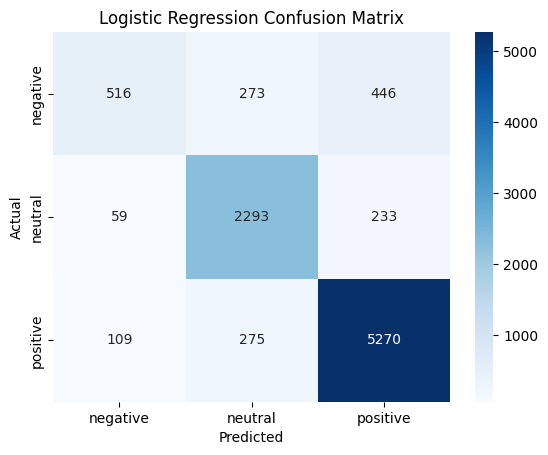

In [29]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

classes = sorted(y_test.unique())

sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model Comparison

### Compare the performance of both models

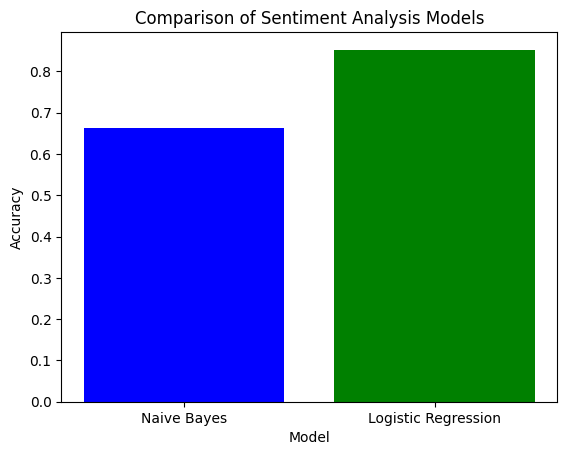

In [25]:
models = ['Naive Bayes', 'Logistic Regression']
accuracies = [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_lr)]

# Plotting accuracy comparison
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Sentiment Analysis Models')
plt.show()